In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/elon-musk-tweets/elonmusk_tweets.csv
/kaggle/input/daily-climate-time-series-data/DailyDelhiClimateTrain.csv
/kaggle/input/daily-climate-time-series-data/DailyDelhiClimateTest.csv


In [4]:
#importing matplotlib for plotting purpose
import matplotlib.pyplot as plt
plt.style.use("seaborn")

## Note that we can resample the time series data by various time periods, including:

* S: Seconds
* min: Minutes
* H: Hours
* D: Day
* W: Week
* M: Month
* Q: Quarter
* A: Year

In [5]:
#reading the data
df=pd.read_csv("../input/daily-climate-time-series-data/DailyDelhiClimateTest.csv",parse_dates=["date"],index_col="date")

In [6]:
#checking the dataframe
df

,meantemp,humidity,wind_speed,meanpressure
date,,,,
2017-01-01,15.913043,85.869565,2.743478,59.000000
2017-01-02,18.500000,77.222222,2.894444,1018.277778
2017-01-03,17.111111,81.888889,4.016667,1018.333333
2017-01-04,18.700000,70.050000,4.545000,1015.700000
2017-01-05,18.388889,74.944444,3.300000,1014.333333
...,...,...,...,...
2017-04-20,34.500000,27.500000,5.562500,998.625000
2017-04-21,34.250000,39.375000,6.962500,999.875000
2017-04-22,32.900000,40.900000,8.890000,1001.600000


In [7]:
#printing the columns
df.columns

Index(['meantemp', 'humidity', 'wind_speed', 'meanpressure'], dtype='object')

In [8]:
df

,meantemp,humidity,wind_speed,meanpressure
date,,,,
2017-01-01,15.913043,85.869565,2.743478,59.000000
2017-01-02,18.500000,77.222222,2.894444,1018.277778
2017-01-03,17.111111,81.888889,4.016667,1018.333333
2017-01-04,18.700000,70.050000,4.545000,1015.700000
2017-01-05,18.388889,74.944444,3.300000,1014.333333
...,...,...,...,...
2017-04-20,34.500000,27.500000,5.562500,998.625000
2017-04-21,34.250000,39.375000,6.962500,999.875000
2017-04-22,32.900000,40.900000,8.890000,1001.600000


In [9]:
#resampling with Week 
df.resample("W").mean()

,meantemp,humidity,wind_speed,meanpressure
date,,,,
2017-01-01,15.913043,85.869565,2.743478,59.000000
2017-01-08,17.487247,80.397627,5.061371,1015.048882
2017-01-15,13.191727,73.335438,6.806319,1017.212474
2017-01-22,14.732486,75.707698,9.368017,1020.516354
2017-01-29,17.239193,78.189352,8.815970,1018.575580
2017-02-05,16.839757,76.019915,5.264149,1016.297175
2017-02-12,15.661508,68.049206,6.182659,1016.573810
2017-02-19,19.402628,65.457885,7.274209,1018.125283
2017-02-26,19.976190,54.192177,11.535034,1011.868197


In [10]:
len(df.resample("W"))

18

In [11]:
# Convenience method for frequency conversion and resampling of time series
x=list(df.resample("W"))

In [12]:
x

[(Timestamp('2017-01-01 00:00:00', freq='W-SUN'),
               meantemp   humidity  wind_speed  meanpressure
  date                                                      
  2017-01-01  15.913043  85.869565    2.743478          59.0),
 (Timestamp('2017-01-08 00:00:00', freq='W-SUN'),
               meantemp   humidity  wind_speed  meanpressure
  date                                                      
  2017-01-02  18.500000  77.222222    2.894444   1018.277778
  2017-01-03  17.111111  81.888889    4.016667   1018.333333
  2017-01-04  18.700000  70.050000    4.545000   1015.700000
  2017-01-05  18.388889  74.944444    3.300000   1014.333333
  2017-01-06  19.318182  79.318182    8.681818   1011.772727
  2017-01-07  14.708333  95.833333   10.041667   1011.375000
  2017-01-08  15.684211  83.526316    1.950000   1015.550000),
 (Timestamp('2017-01-15 00:00:00', freq='W-SUN'),
               meantemp   humidity  wind_speed  meanpressure
  date                                               

In [13]:
list(df.resample("W"))[1][1]

,meantemp,humidity,wind_speed,meanpressure
date,,,,
2017-01-02,18.500000,77.222222,2.894444,1018.277778
2017-01-03,17.111111,81.888889,4.016667,1018.333333
2017-01-04,18.700000,70.050000,4.545000,1015.700000
2017-01-05,18.388889,74.944444,3.300000,1014.333333
2017-01-06,19.318182,79.318182,8.681818,1011.772727
2017-01-07,14.708333,95.833333,10.041667,1011.375000
2017-01-08,15.684211,83.526316,1.950000,1015.550000


In [15]:
x=pd.DataFrame(x)

In [16]:
x

,0,1
0,2017-01-01,meantemp humidity wind_speed ...
1,2017-01-08,meantemp humidity wind_speed ...
2,2017-01-15,meantemp humidity wind_speed ...
3,2017-01-22,meantemp humidity wind_speed ...
4,2017-01-29,meantemp humidity wind_speed ...
5,2017-02-05,meantemp humidity wind_speed ...
6,2017-02-12,meantemp humidity wind_speed ...
7,2017-02-19,meantemp humidity wind_speed ...
8,2017-02-26,meantemp humidity wind_speed ...
9,2017-03-05,meantemp humidity wind_speed ...


In [17]:
x.loc[0][1]

,meantemp,humidity,wind_speed,meanpressure
date,,,,
2017-01-01,15.913043,85.869565,2.743478,59.0


In [18]:
df.resample("M").mean()

,meantemp,humidity,wind_speed,meanpressure
date,,,,
2017-01-31,15.710873,77.188256,7.162982,986.767947
2017-02-28,18.349981,64.375728,7.566294,1015.574251
2017-03-31,23.753760,48.009694,8.884385,1010.469641
2017-04-30,30.753663,30.408185,9.128446,1004.564831


# Kind for Downsampling

In [23]:
df.resample("W",kind="timestamp").mean()

,meantemp,humidity,wind_speed,meanpressure
date,,,,
2017-01-01,15.913043,85.869565,2.743478,59.000000
2017-01-08,17.487247,80.397627,5.061371,1015.048882
2017-01-15,13.191727,73.335438,6.806319,1017.212474
2017-01-22,14.732486,75.707698,9.368017,1020.516354
2017-01-29,17.239193,78.189352,8.815970,1018.575580
2017-02-05,16.839757,76.019915,5.264149,1016.297175
2017-02-12,15.661508,68.049206,6.182659,1016.573810
2017-02-19,19.402628,65.457885,7.274209,1018.125283
2017-02-26,19.976190,54.192177,11.535034,1011.868197


In [24]:
df.resample("W",kind="period").mean()

,meantemp,humidity,wind_speed,meanpressure
date,,,,
2016-12-26/2017-01-01,15.913043,85.869565,2.743478,59.000000
2017-01-02/2017-01-08,17.487247,80.397627,5.061371,1015.048882
2017-01-09/2017-01-15,13.191727,73.335438,6.806319,1017.212474
2017-01-16/2017-01-22,14.732486,75.707698,9.368017,1020.516354
2017-01-23/2017-01-29,17.239193,78.189352,8.815970,1018.575580
2017-01-30/2017-02-05,16.839757,76.019915,5.264149,1016.297175
2017-02-06/2017-02-12,15.661508,68.049206,6.182659,1016.573810
2017-02-13/2017-02-19,19.402628,65.457885,7.274209,1018.125283
2017-02-20/2017-02-26,19.976190,54.192177,11.535034,1011.868197


<AxesSubplot:xlabel='date'>

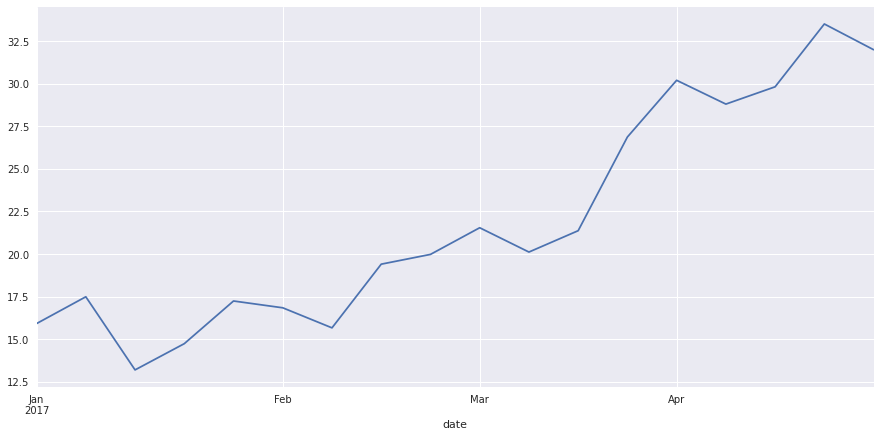

In [25]:
week = df.resample("W",kind="period").mean()
week.meantemp.plot(figsize=(15,7))

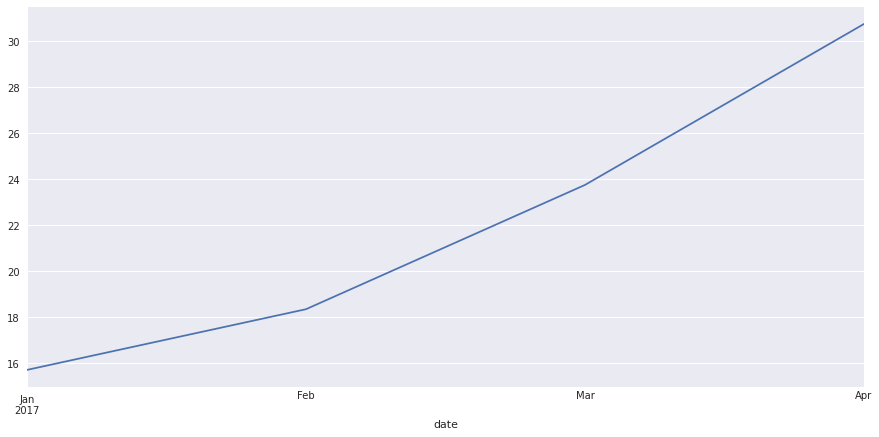

,meantemp,humidity,wind_speed,meanpressure
date,,,,
2017-01,15.710873,77.188256,7.162982,986.767947
2017-02,18.349981,64.375728,7.566294,1015.574251
2017-03,23.753760,48.009694,8.884385,1010.469641
2017-04,30.753663,30.408185,9.128446,1004.564831


In [31]:
month = df.resample("M",kind="period").mean()
month.meantemp.plot(figsize=(15,7))
plt.show()
month

,meantemp,humidity,wind_speed,meanpressure
date,,,,
2017Q1,19.302256,63.151742,7.881385,1003.893825
2017Q2,30.753663,30.408185,9.128446,1004.564831


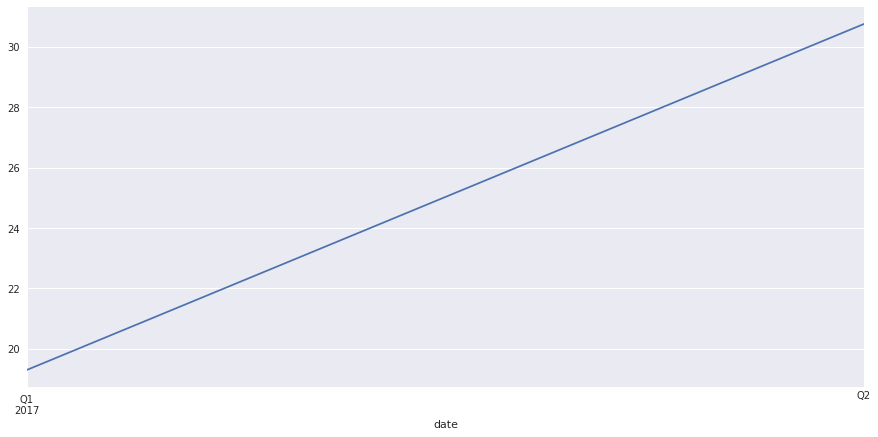

In [29]:
quater = df.resample("Q",kind="period").mean()
quater.meantemp.plot(figsize=(15,7))
quater

In [35]:
year = df.resample("A",kind="period").mean()
year

,meantemp,humidity,wind_speed,meanpressure
date,,,,
2017,21.713079,56.258362,8.143924,1004.03509
